In [1]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as graph
import seaborn as sns
from IPython.display import display, HTML

from AssignmentThreeFunctions import get_parent_offspring_data, get_qtl_data, init_trait_data, init_qtl_marker_data, select_by_markers

sns.set(font_scale=1.5)
sns.set_style('ticks')

%matplotlib inline

# Part 1: Narrow Sense Heritability

**Question 1**: Estimate narrow-sense heritability for the four traits. [DONE]

**Question 2**: Discuss the relevance of genes vs environment in affecting the studied traits. *In a few sentences.*

In [2]:
raw_data = get_parent_offspring_data()
display(raw_data.head(1))

# Trait 1
trait_1 = init_trait_data(trait='t1')
display(trait_1.head(1))

# Trait 2
trait_2 = init_trait_data(trait='t2')
display(trait_2.head(1))

# Trait 3
trait_3 = init_trait_data(trait='t3')
display(trait_3.head(1))

# Trait 4
trait_4 = init_trait_data(trait='t4')
display(trait_4.head(1))

,ID,p1_t1,p2_t1,o_t1,p1_t2,p2_t2,o_t2,p1_t3,p2_t3,o_t3,p1_t4,p2_t4,o_t4
0,901,199.288566,198.36864,201.724069,1.444091,1.41216,1.638521,3.015583,2.780835,2.834949,2.684854,2.828727,2.599553


,parent1,parent2,offspring,parent_mid
0,199.288566,198.36864,201.724069,198.828603


,parent1,parent2,offspring,parent_mid
0,1.444091,1.41216,1.638521,1.428126


,parent1,parent2,offspring,parent_mid
0,3.015583,2.780835,2.834949,2.898209


,parent1,parent2,offspring,parent_mid
0,2.684854,2.828727,2.599553,2.756791


Rsq    : 0.3647773700676622
Adj Rsq: 0.3420908475700787


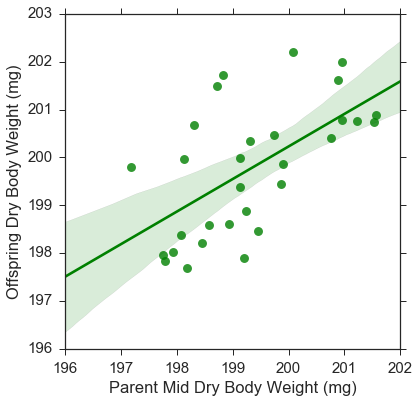

Rsq    : 0.1077840329787787
Adj Rsq: 0.07591917701373496


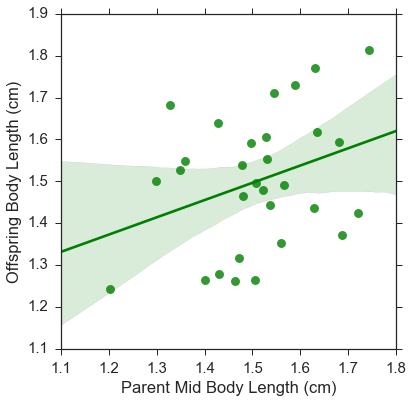

Rsq    : 0.2190245001532356
Adj Rsq: 0.19113251801585107


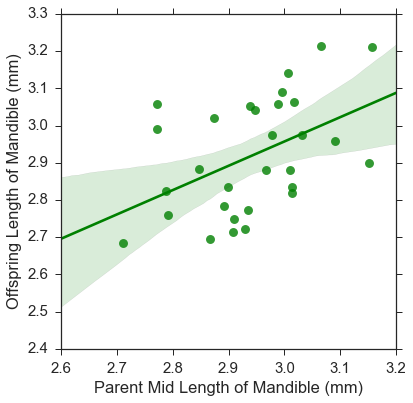

Rsq    : 0.004901231862352362
Adj Rsq: -0.030638009856849502


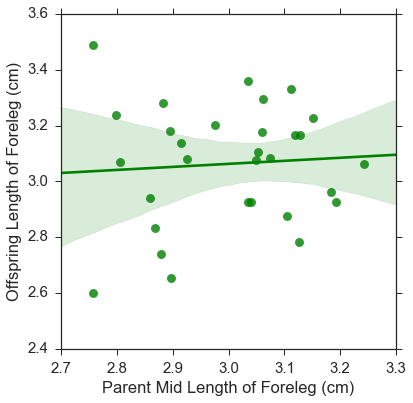

In [3]:
# Parent Offspring Regressions (OLS Regression)
from pandas.stats.api import ols

traits = [trait_1, trait_2, trait_3, trait_4]
names = ['Dry Body Weight (mg)', 'Body Length (cm)', 'Length of Mandible (mm)', 'Length of Foreleg (cm)']

for i, trait in enumerate(traits):
    display(HTML('<hr><h2>Trait {}: {}</h2>'.format(i + 1, names[i])))
    
    # Compute heritability
    results = ols(x=trait['parent_mid'], y=trait['offspring'])
    
    # Quick Stats
    output = 'Heritability: {} p: {}'.format(round(results.beta['x'], 4), round(results.p_value['x'], 4))
    if results.p_value['x'] <= 0.05:
        display(HTML('<strong><h4>SIGNIFICANT<br/>{}*</h4></strong>'.format(output)))
    else:
        display(HTML('<h4>{}</h4>'.format(output)))
        
    print('Rsq    : {}'.format(results.r2))
    print('Adj Rsq: {}'.format(results.r2_adj))
            
    # Graph Regression to the mean
    graph.figure(figsize=(6, 6))
    sns.regplot(x=trait['parent_mid'], y=trait['offspring'], color='g', scatter_kws={'s': 80})
    graph.xlabel('Parent Mid {}'.format(names[i]))
    graph.ylabel('Offspring {}'.format(names[i]))
    graph.show()
    
    # Output Comprehensive Results
    # print(results)

# Part 2: QTL Analysis

**Question 3**: Naive QTL analysis to determine how many QTLs affect the trait and where they are on the genetic map. *No regression graphs!* [DONE]

**Question 4**: Discuss the relative effects of the identified QTL alleles on horn size? Do QTL allele effect sizes reflect differences between the Short Horn and Long Horn inbred lines?

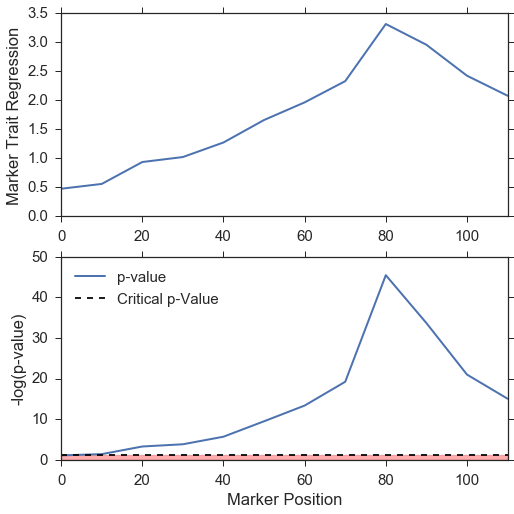

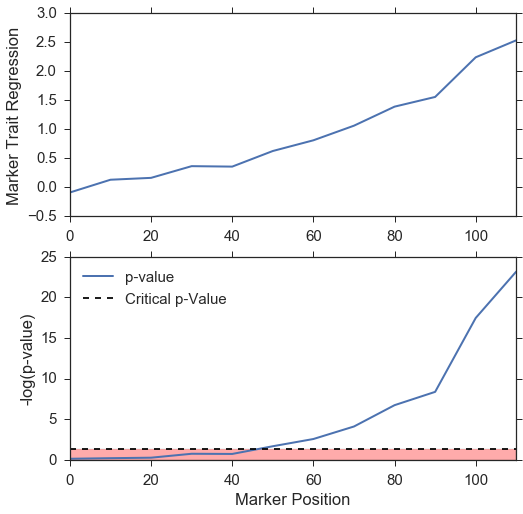

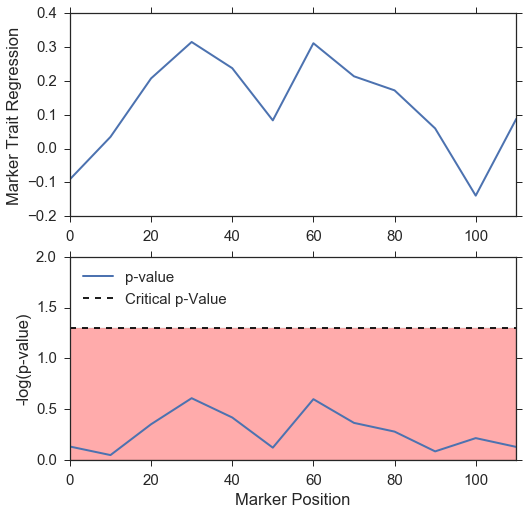

In [4]:
# Calculate the loci QTL Data
chromosome_1 = init_qtl_marker_data(chromosome='MK-1')
chromosome_2 = init_qtl_marker_data(chromosome='MK-2')
chromosome_3 = init_qtl_marker_data(chromosome='MK-3')

chromosomes = [chromosome_1, chromosome_2, chromosome_3]
critical_value = 0.05

for i, chromo in enumerate(chromosomes):
    display(HTML('<hr><h2>Chromosome {}</h2>'.format(i+1)))
    
    chromo['p-crit'] = critical_value
    
    graph.figure(figsize=(8,8))
    
    graph.subplot(211)
    graph.plot(chromo['Position'], chromo['Slope'], linewidth=2)
    graph.ylabel('Marker Trait Regression')
    graph.xlim([0, 110])
    
    graph.subplot(212)
    graph.plot(chromo['Position'], -np.log10(chromo['p-value']), linewidth=2)
    graph.plot(chromo['Position'], -np.log10(chromo['p-crit']), linestyle='--', c='black', label='Critical p-Value')
    graph.fill_between(chromo['Position'], 0, -np.log10(chromo['p-crit']), facecolor='red', alpha='0.33')
    graph.legend(loc='upper left')
    graph.xlabel('Marker Position')
    graph.ylabel('-log(p-value)')
    graph.xlim([0, 110])
    if chromo['p-value'].min() > 0.05:
        graph.ylim(ymax=2)
    
    graph.show()

# Predicting Phenotype from Genotype

Even though the markers are must likely not the gene responsible for the phenotype it is still very likely that, due to linkage, we could predict phenotype from the genotypes of the QTLs.

For my dataset their appears to only be 2 QTLs. While I should still be able to make predictions the confidence intervals might be too large to be useful.

Those markers are 
- MK-1-9
- MK-2-12

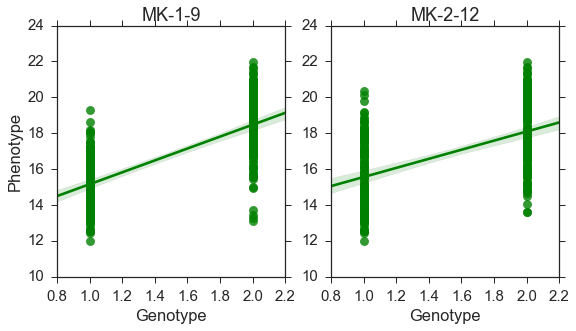

In [5]:
# Get suspected QTLs for the regression model.
markers = ['MK-1-9', 'MK-2-12']
data = select_by_markers(markers)

x = np.array(data[markers].values.tolist())
y = np.array(data['phenotype'].values.tolist())

# Data Exploration
graph.figure(figsize=(9, 4.5))

graph.subplot(121)
graph.title(markers[0])
sns.regplot(x=data[markers[0]], y=data['phenotype'], color='g', scatter_kws={'s': 80})
graph.xlabel('Genotype')
graph.ylabel('Phenotype')

graph.subplot(122)
graph.title(markers[1])
sns.regplot(x=data[markers[1]], y=data['phenotype'], color='g', scatter_kws={'s': 80})
graph.xlabel('Genotype')
graph.ylabel('')

graph.show()

This data looks good for MLRs but I'll make a K-NN Model just in case.

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error

# Train Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

# Models
simple_linear_regression = LinearRegression()
simple_linear_regression.fit(x_train, y_train)

parameters = [
    {
        'n_neighbors': np.arange(start=1, stop=150, step=2, dtype=int)
    }
]
knn_grid_search = GridSearchCV(estimator=KNeighborsRegressor(), param_grid=parameters, cv=4, n_jobs=-1)
knn_grid_search = knn_grid_search.fit(x_train, y_train)
knn_regression = knn_grid_search.best_estimator_

# Validate Models
linear_regression_error = mean_squared_error(y_test, simple_linear_regression.predict(x_test))
knn_regression_error = mean_squared_error(y_test, knn_regression.predict(x_test))

print('Linear Regression MSE: {}'.format(linear_regression_error))
print('K-NN Regression MSE  : {}'.format(knn_regression_error))

Linear Regression MSE: 1.6924862468342408
K-NN Regression MSE  : 1.7110982926947156
